# PDF to Notebook Conversion
This notebook extracts content from a PDF and converts it into a Jupyter notebook format for grading.

Matplotlib is building the font cache; this may take a moment.


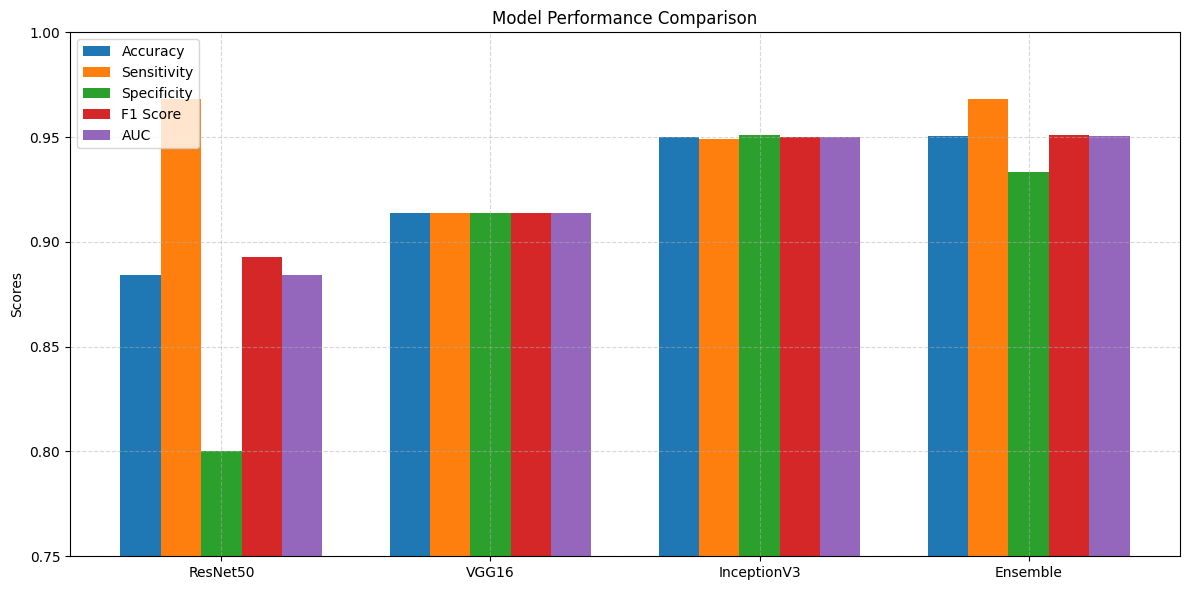

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their metrics
models = ['ResNet50', 'VGG16', 'InceptionV3', 'Ensemble']
accuracy = [0.8840, 0.9137, 0.9500, 0.9505]
sensitivity = [0.9681, 0.9139, 0.9489, 0.9681]
specificity = [0.8000, 0.9139, 0.9511, 0.9333]
f1_score = [0.8930, 0.9137, 0.9499, 0.9509]
auc = [0.8840, 0.9139, 0.9500, 0.9507]

x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - width, sensitivity, width, label='Sensitivity')
bars3 = ax.bar(x, specificity, width, label='Specificity')
bars4 = ax.bar(x + width, f1_score, width, label='F1 Score')
bars5 = ax.bar(x + 2*width, auc, width, label='AUC')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.75, 1.0)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Import required libraries
import PyPDF2
import nbformat as nbf

In [ ]:
# Function to extract text from a PDF file
def extract_pdf_content(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        content = ''
        for page in reader.pages:
            content += page.extract_text()
        return content

In [ ]:
# Function to create a Jupyter notebook from extracted content
def create_notebook_from_pdf(content, output_path):
    notebook = nbf.v4.new_notebook()
    notebook.cells.append(nbf.v4.new_markdown_cell('# Extracted Content'))
    notebook.cells.append(nbf.v4.new_code_cell(content))
    with open(output_path, 'w') as f:
        nbf.write(notebook, f)

In [ ]:
# Example usage
pdf_path = 'example.pdf'  # Path to the PDF file
output_path = 'extracted_notebook.ipynb'  # Path to save the notebook
content = extract_pdf_content(pdf_path)
create_notebook_from_pdf(content, output_path)